# Heart Disease Prediction Model Using Majority Voting Ensembles

## Implementation

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#importing the dataset
dataset=pd.read_csv('desktop\Heart(2).csv')

In [3]:
print(dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    

In [5]:
#Description of dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#checking for any missing values in the dataset
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

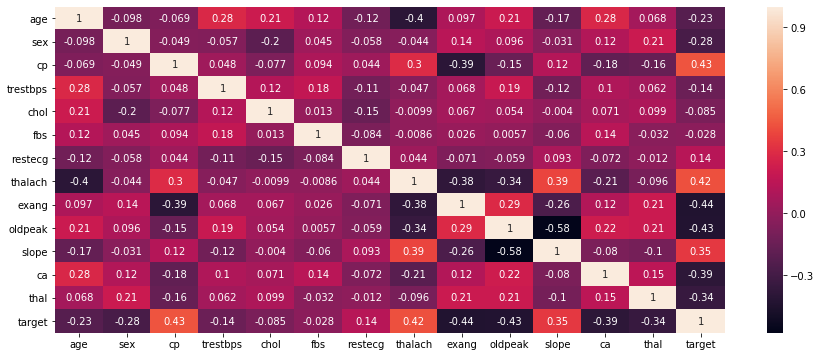

In [7]:
#plotting correlation values between all the variables
plt.figure(figsize=(15,6))
sns.heatmap(dataset.corr(),annot=True)

In [8]:
#Values in target column
print(dataset['target'].unique())

[1 0]


1    165
0    138
Name: target, dtype: int64
Percentage of patients without disease: 45.54
Percentage of patients with disease: 54.46


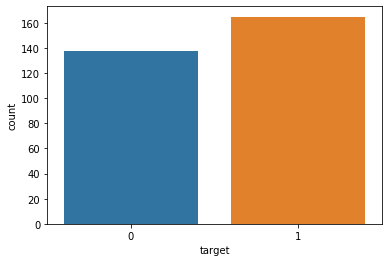

In [9]:
#Counting the number of patients "with disease" and "without disease"
sns.countplot(dataset['target'])
target_numbers = dataset.target.value_counts()
print(target_numbers)

print("Percentage of patients without disease:",round(target_numbers[0]*100/303,2))
print("Percentage of patients with disease:",round(target_numbers[1]*100/303,2))


In [10]:
#adding dummy variables to deal with categorical variables
dataset=pd.get_dummies(dataset,columns=['cp','slope','ca','thal'])

In [11]:
#taking the independent and dependent values
x=dataset.drop(['target'],axis=1).values
y=dataset['target'].values

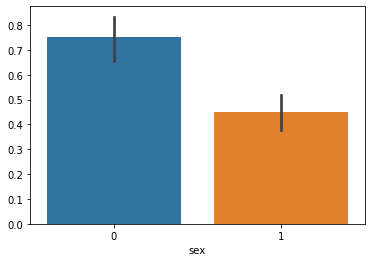

In [12]:
#graph shows that female are more likely to have heart disease
sns.barplot(dataset["sex"],y)


In [13]:
#dividing the dataset into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [14]:
#performing scaling on all values so as to prevent any one variable to dominate over the other
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
train_x=scx.fit_transform(train_x)
test_x=scx.transform(test_x)

In [15]:
#K-Nearest Neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#GridSearchCV to find the optimal values of hyperparameters
parameters=[{'n_neighbors':np.arange(1,10)}]
grid_search=GridSearchCV(knn,parameters,scoring='accuracy',cv=5)
grid_search.fit(train_x,train_y)

print(grid_search.best_params_)
best_knn=grid_search.best_estimator_
print('knn :{}'.format(best_knn.score(test_x,test_y)))

y_pred_knn=best_knn.predict(test_x)
cm=confusion_matrix(test_y,y_pred_knn)
print(cm)



{'n_neighbors': 9}
knn :0.9016393442622951
[[24  4]
 [ 2 31]]


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


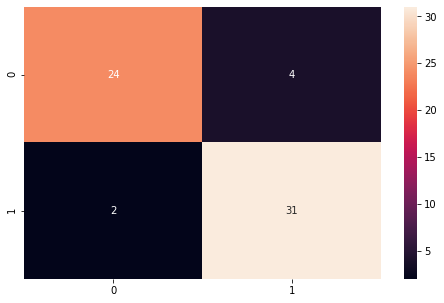

In [16]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [17]:
#Calculating Sensitivity and Specificity
sensitivity_KNN = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_KNN : ', sensitivity_KNN )

specificity_KNN = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_KNN : ', specificity_KNN)

sensitivity_KNN=round(sensitivity_KNN*100,2)
print(sensitivity_KNN)
specificity_KNN=round(specificity_KNN*100,2)
print(specificity_KNN)

Sensitivity_KNN :  0.9393939393939394
Specificity_KNN :  0.8571428571428571
93.94
85.71


In [18]:
#Calculating PPV and NPV
precision_KNN = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_KNN : ', precision_KNN )

negative_predictive_value_KNN = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_KNN : ', negative_predictive_value_KNN)

precision_KNN=round(precision_KNN*100,2)
print(precision_KNN)
negative_predictive_value_KNN=round(negative_predictive_value_KNN*100,2)
print(negative_predictive_value_KNN)

Precision_KNN :  0.8857142857142857
Negative_Predictive_Value_KNN :  0.9230769230769231
88.57
92.31


In [19]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

#GridSearchCV to find the optimal values of hyperparameters
parameters=[{'n_estimators':[100,150,200]}]
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',cv=5)
grid_search.fit(train_x,train_y)

print(grid_search.best_params_)
best_rfc=grid_search.best_estimator_
print('rfc :{}'.format(best_rfc.score(test_x,test_y)))

y_pred_rfc=best_rfc.predict(test_x)
cm=confusion_matrix(test_y,y_pred_rfc)
print(cm)


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_estimators': 200}
rfc :0.8524590163934426
[[24  4]
 [ 5 28]]


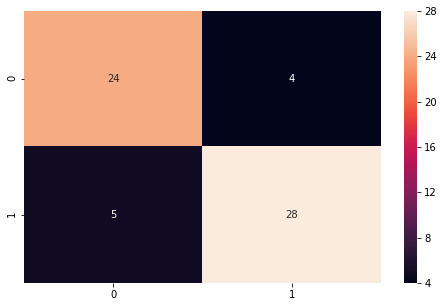

In [20]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [21]:
#Calculating Sensitivity and Specificity
sensitivity_RFC = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_RFC : ', sensitivity_RFC )

specificity_RFC = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_RFC : ', specificity_RFC)

sensitivity_RFC=round(sensitivity_RFC*100,2)
print(sensitivity_RFC)
specificity_RFC=round(specificity_RFC*100,2)
print(specificity_RFC)

Sensitivity_RFC :  0.8484848484848485
Specificity_RFC :  0.8571428571428571
84.85
85.71


In [22]:
#Calculating PPV and NPV
precision_RFC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_RFC : ', precision_RFC )

negative_predictive_value_RFC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_RFC : ', negative_predictive_value_RFC)

precision_RFC=round(precision_RFC*100,2)
print(precision_RFC)
negative_predictive_value_RFC=round(negative_predictive_value_RFC*100,2)
print(negative_predictive_value_RFC)

Precision_RFC :  0.875
Negative_Predictive_Value_RFC :  0.8275862068965517
87.5
82.76


In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

#GridSearchCV to find the optimal values of hyperparameters
parameters=[{'max_depth':[3,None]},
             {'min_samples_leaf':np.arange(1,10)},
             {'criterion':['gini','entropy']}]
grid_search=GridSearchCV(dtc,parameters,scoring='accuracy',cv=5)
grid_search.fit(train_x,train_y)

print(grid_search.best_params_)
best_dtc=grid_search.best_estimator_
print('dtc :{}'.format(best_dtc.score(test_x,test_y)))

y_pred_dtc=best_dtc.predict(test_x)
cm=confusion_matrix(test_y,y_pred_dtc)
print(cm)

{'max_depth': 3}
dtc :0.7868852459016393
[[21  7]
 [ 6 27]]


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


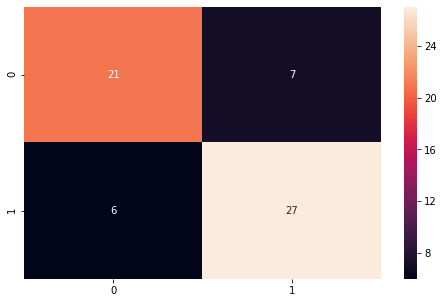

In [24]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [25]:
#Calculating Sensitivity and Specificity
sensitivity_DTC = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_DTC : ', sensitivity_DTC )

specificity_DTC = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_DTC : ', specificity_DTC)

sensitivity_DTC=round(sensitivity_DTC*100,2)
print(sensitivity_DTC)
specificity_DTC=round(specificity_DTC*100,2)
print(specificity_DTC)

Sensitivity_DTC :  0.8181818181818182
Specificity_DTC :  0.75
81.82
75.0


In [26]:
#Calculating PPV and NPV
precision_DTC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_DTC : ', precision_DTC )

negative_predictive_value_DTC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_DTC : ', negative_predictive_value_DTC)

precision_DTC=round(precision_DTC*100,2)
print(precision_DTC)
negative_predictive_value_DTC=round(negative_predictive_value_DTC*100,2)
print(negative_predictive_value_DTC)

Precision_DTC :  0.7941176470588235
Negative_Predictive_Value_DTC :  0.7777777777777778
79.41
77.78


In [27]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(train_x,train_y)

print('nbc: {}'.format(nbc.score(test_x,test_y)))

y_pred_nbc=nbc.predict(test_x)
cm=confusion_matrix(test_y,y_pred_nbc)
print(cm)

nbc: 0.9016393442622951
[[24  4]
 [ 2 31]]


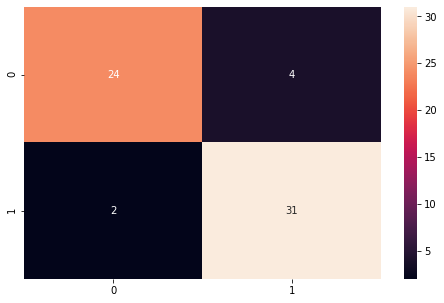

In [28]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [29]:
#Calculating Sensitivity and Specificity
sensitivity_NBC = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_NBC : ', sensitivity_NBC )

specificity_NBC = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_NBC : ', specificity_NBC)

sensitivity_NBC=round(sensitivity_NBC*100,2)
print(sensitivity_NBC)
specificity_NBC=round(specificity_NBC*100,2)
print(specificity_NBC)

Sensitivity_NBC :  0.9393939393939394
Specificity_NBC :  0.8571428571428571
93.94
85.71


In [30]:
#Calculating PPV and NPV
precision_NBC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_NBC : ', precision_NBC )

negative_predictive_value_NBC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_NBC : ', negative_predictive_value_NBC)

precision_NBC=round(precision_NBC*100,2)
print(precision_NBC)
negative_predictive_value_NBC=round(negative_predictive_value_NBC*100,2)
print(negative_predictive_value_NBC)

Precision_NBC :  0.8857142857142857
Negative_Predictive_Value_NBC :  0.9230769230769231
88.57
92.31


In [31]:
#Support Vector Machine
from sklearn.svm import SVC
svc_scores = []

#Finding the best kernel in terms of accuracies
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(train_x,train_y)
    svc_scores.append(svc_classifier.score(test_x, test_y))
    
print(svc_scores)

#Applying the best kernel 
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0,probability=True)
#classifier2=svm.SVC(probability=True)
classifier2.fit(train_x, train_y)
print('kernel: {}'.format(classifier2.score(test_x, test_y)))

y_pred_svc=classifier2.predict(test_x)
cm=confusion_matrix(test_y,y_pred_svc)
print(cm)


[0.9016393442622951, 0.8688524590163934, 0.8360655737704918, 0.8852459016393442]
kernel: 0.9016393442622951
[[24  4]
 [ 2 31]]


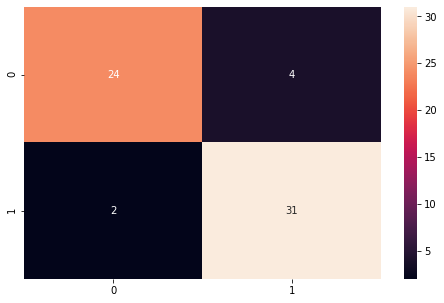

In [32]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [33]:
#Calculating Sensitivity and Specificity
sensitivity_SVC = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_SVC : ', sensitivity_SVC )

specificity_SVC = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_SVC : ', specificity_SVC)

sensitivity_SVC=round(sensitivity_SVC*100,2)
print(sensitivity_SVC)
specificity_SVC=round(specificity_SVC*100,2)
print(specificity_SVC)



Sensitivity_SVC :  0.9393939393939394
Specificity_SVC :  0.8571428571428571
93.94
85.71


In [34]:
#Calculating PPV and NPV
precision_SVC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_SVC : ', precision_SVC )

negative_predictive_value_SVC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_SVC : ', negative_predictive_value_SVC)

precision_SVC=round(precision_SVC*100,2)
print(precision_SVC)
negative_predictive_value_SVC=round(negative_predictive_value_SVC*100,2)
print(negative_predictive_value_SVC)

Precision_SVC :  0.8857142857142857
Negative_Predictive_Value_SVC :  0.9230769230769231
88.57
92.31


In [35]:
#XGBOOST
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_x, train_y)

#GridSearchCV to find the optimal values of hyperparameters
parameters={'n_estimators':[80,100,150,200],'max_depth':np.arange(3,10),'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
grid_search=GridSearchCV(xgb_model,parameters,scoring='accuracy',cv=5)
grid_search.fit(train_x,train_y)

print(grid_search.best_params_)
best_xgb=grid_search.best_estimator_
y_pred_xgb=best_xgb.predict(test_x)
print('xgb :{}'.format(best_xgb.score(test_x,test_y)))

y_pred_xgboost=best_xgb.predict(test_x)
cm=confusion_matrix(test_y,y_pred_xgboost)
print(cm)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.125, 'max_depth': 4, 'n_estimators': 100}
xgb :0.8524590163934426
[[23  5]
 [ 4 29]]


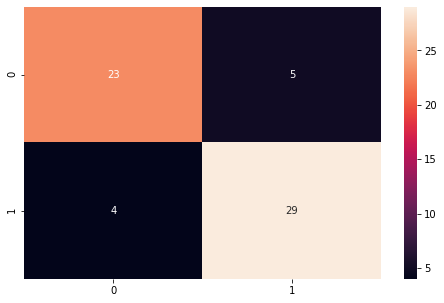

In [36]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [37]:
#Calculating Sensitivity and Specificity
sensitivity_XG = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_XG : ', sensitivity_XG )

specificity_XG = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_XG : ', specificity_XG)

sensitivity_XG=round(sensitivity_XG*100,2)
print(sensitivity_XG)
specificity_XG=round(specificity_XG*100,2)
print(specificity_XG)

Sensitivity_XG :  0.8787878787878788
Specificity_XG :  0.8214285714285714
87.88
82.14


In [38]:
#Calculating PPV and NPV
precision_XG =cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_XG : ', precision_XG )

negative_predictive_value_XG = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_XG : ', negative_predictive_value_XG)

precision_XG=round(precision_XG*100,2)
print(precision_XG)
negative_predictive_value_XG=round(negative_predictive_value_XG*100,2)
print(negative_predictive_value_XG)

Precision_XG :  0.8529411764705882
Negative_Predictive_Value_XG :  0.8518518518518519
85.29
85.19


In [39]:
#LightGBM
import lightgbm as lgb
estimator = lgb.LGBMClassifier()

#GridSearchCV to find the optimal values of hyperparameters
param_grid = {
    'n_estimators': [x for x in range(20, 150, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid,n_jobs=-1,cv=5)
grid.fit(train_x, train_y)

print (grid.best_params_)
best_light=grid.best_estimator_
y_pred_lightgbm=best_light.predict(test_x)
print('light :{}'.format(best_light.score(test_x,test_y)))

'''estimator1 = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 60, num_leaves = 38)
estimator1.fit(train_x,train_y)

print(estimator1.score(test_x,test_y))
'''
y_pred_lightboost=best_light.predict(test_x)
cm=confusion_matrix(test_y,y_pred_lightboost)
print(cm)


{'learning_rate': 0.125, 'n_estimators': 26}
light :0.8524590163934426
[[22  6]
 [ 3 30]]


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


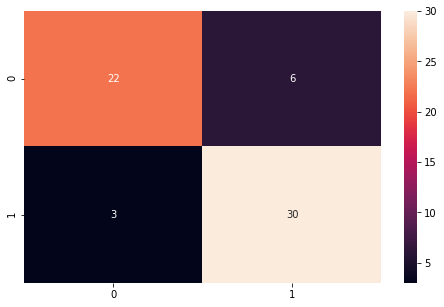

In [40]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [41]:
#Calculating Sensitivity and Specificity
sensitivity_LIGHT = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_LIGHT : ', sensitivity_LIGHT )

specificity_LIGHT = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_LIGHT : ', specificity_LIGHT)

sensitivity_LIGHT=round(sensitivity_LIGHT*100,2)
print(sensitivity_LIGHT)
specificity_LIGHT=round(specificity_LIGHT*100,2)
print(specificity_LIGHT)

Sensitivity_LIGHT :  0.9090909090909091
Specificity_LIGHT :  0.7857142857142857
90.91
78.57


In [42]:
#Calculating PPV and NPV
precision_LIGHT = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_LIGHT : ', precision_LIGHT )

negative_predictive_value_LIGHT = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_LIGHT : ', negative_predictive_value_LIGHT)

precision_LIGHT=round(precision_LIGHT*100,2)
print(precision_LIGHT)
negative_predictive_value_LIGHT=round(negative_predictive_value_LIGHT*100,2)
print(negative_predictive_value_LIGHT)

Precision_LIGHT :  0.8333333333333334
Negative_Predictive_Value_LIGHT :  0.88
83.33
88.0


In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(train_x,train_y)

y_pred_logistic=classifier.predict(test_x)
print('logistic :{}'.format(classifier.score(test_x,test_y)))

y_pred_logistic=classifier.predict(test_x)
cm=confusion_matrix(test_y,y_pred_logistic)
print(cm)



logistic :0.8688524590163934
[[23  5]
 [ 3 30]]


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


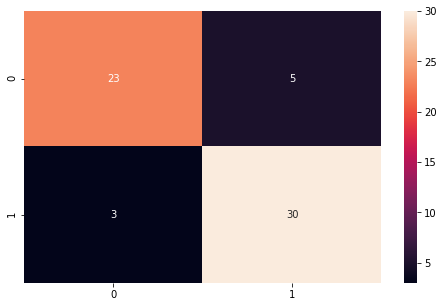

In [44]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [45]:
#Calculating Sensitivity and Specificity
sensitivity_Logistic = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_Logistic : ', sensitivity_Logistic )

specificity_Logistic = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_Logistic : ', specificity_Logistic)

sensitivity_Logistic=round(sensitivity_Logistic*100,2)
print(sensitivity_Logistic)
specificity_Logistic=round(specificity_Logistic*100,2)
print(specificity_Logistic)

Sensitivity_Logistic :  0.9090909090909091
Specificity_Logistic :  0.8214285714285714
90.91
82.14


In [46]:
#Calculating PPV and NPV
precision_LOGISTIC = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_LOGISTIC : ', precision_LOGISTIC )

negative_predictive_value_LOGISTIC = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_LOGISTIC : ', negative_predictive_value_LOGISTIC)

precision_LOGISTIC=round(precision_LOGISTIC*100,2)
print(precision_LOGISTIC)
negative_predictive_value_LOGISTIC=round(negative_predictive_value_LOGISTIC*100,2)
print(negative_predictive_value_LOGISTIC)

Precision_LOGISTIC :  0.8571428571428571
Negative_Predictive_Value_LOGISTIC :  0.8846153846153846
85.71
88.46


In [47]:
#Multi model ensemble formation (NBC and SVC)
from sklearn.ensemble import VotingClassifier
estimators=[('svc',classifier2),('nbc',nbc)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(train_x, train_y)
print("Ensemble of NBC and SVC")
ensemble_accuracy=round(ensemble.score(test_x,test_y)*100,2)
print("Accuracy of the new multi model classifier is:",ensemble.score(test_x, test_y))
print(ensemble_accuracy) 


y_pred_ensemble1=ensemble.predict(test_x)
cm=confusion_matrix(test_y,y_pred_ensemble1)
print(cm)

Ensemble of NBC and SVC
Accuracy of the new multi model classifier is: 0.9180327868852459
91.8
[[25  3]
 [ 2 31]]


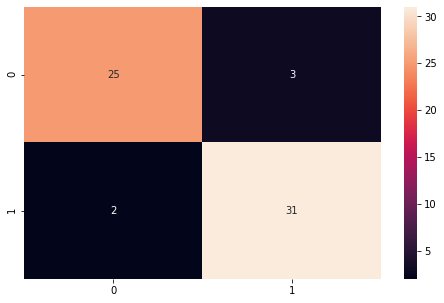

In [48]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [49]:
#Calculating Sensitivity and Specificity
sensitivity_Ensemble1 = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_Ensemble1 : ', sensitivity_Ensemble1 )

specificity_Ensemble1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_Ensemble1 : ', specificity_Ensemble1)

sensitivity_Ensemble1=round(sensitivity_Ensemble1*100,2)
print(sensitivity_Ensemble1)
specificity_Ensemble1=round(specificity_Ensemble1*100,2)
print(specificity_Ensemble1)

Sensitivity_Ensemble1 :  0.9393939393939394
Specificity_Ensemble1 :  0.8928571428571429
93.94
89.29


In [50]:
#Calculating PPV and NPV
precision_ENSEMBLE1 = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_ENSEMBLE1 : ', precision_ENSEMBLE1 )

negative_predictive_value_ENSEMBLE1 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_ENSEMBLE1 : ', negative_predictive_value_ENSEMBLE1)

precision_ENSEMBLE1=round(precision_ENSEMBLE1*100,2)
print(precision_ENSEMBLE1)
negative_predictive_value_ENSEMBLE1=round(negative_predictive_value_ENSEMBLE1*100,2)
print(negative_predictive_value_ENSEMBLE1)

Precision_ENSEMBLE1 :  0.9117647058823529
Negative_Predictive_Value_ENSEMBLE1 :  0.9259259259259259
91.18
92.59


In [51]:
#Multi model ensemble formation (Logistic,XGB and RFC)
from sklearn.ensemble import VotingClassifier
estimators=[('logistic',classifier),('xgb',best_xgb),('rfc',best_rfc)]
ensemble1 = VotingClassifier(estimators, voting='hard')
ensemble1.fit(train_x, train_y)
print("Ensemble of Logistic Regression, XGB and RFC")
ensemble_accuracy1=round(ensemble1.score(test_x,test_y)*100,2)
print("Accuracy of the new multi model classifier is:",ensemble1.score(test_x, test_y))
print(ensemble_accuracy1) 

y_pred_ensemble2=ensemble1.predict(test_x)
cm=confusion_matrix(test_y,y_pred_ensemble2)
print(cm)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ensemble of Logistic Regression, XGB and RFC
Accuracy of the new multi model classifier is: 0.8852459016393442
88.52
[[24  4]
 [ 3 30]]


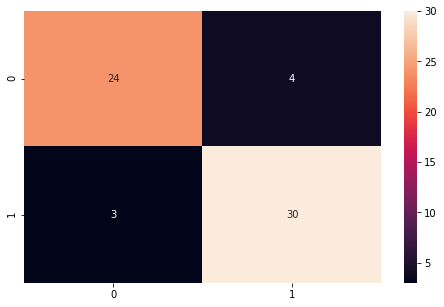

In [52]:
#Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)

In [53]:
#Calculating Sensitivity and Specificity
sensitivity_Ensemble2 = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity_Ensemble2 : ', sensitivity_Ensemble2 )

specificity_Ensemble2 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity_Ensemble2 : ', specificity_Ensemble2)

sensitivity_Ensemble2=round(sensitivity_Ensemble2*100,2)
print(sensitivity_Ensemble2)
specificity_Ensemble2=round(specificity_Ensemble2*100,2)
print(specificity_Ensemble2)

Sensitivity_Ensemble2 :  0.9090909090909091
Specificity_Ensemble2 :  0.8571428571428571
90.91
85.71


In [54]:
#Calculating PPV and NPV
precision_ENSEMBLE2 = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision_ENSEMBLE2 : ', precision_ENSEMBLE2 )

negative_predictive_value_ENSEMBLE2 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Negative_Predictive_Value_ENSEMBLE2 : ', negative_predictive_value_ENSEMBLE2)

precision_ENSEMBLE2=round(precision_ENSEMBLE2*100,2)
print(precision_ENSEMBLE2)
negative_predictive_value_ENSEMBLE2=round(negative_predictive_value_ENSEMBLE2*100,2)
print(negative_predictive_value_ENSEMBLE2)

Precision_ENSEMBLE2 :  0.8823529411764706
Negative_Predictive_Value_ENSEMBLE2 :  0.8888888888888888
88.24
88.89


In [55]:
#Printing the accuracies of all models implemented above
from sklearn.metrics import accuracy_score

score_lr = round(accuracy_score(test_y,y_pred_logistic)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

score_nb = round(accuracy_score(test_y,y_pred_nbc)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

score_svm = round(accuracy_score(test_y,y_pred_svc)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

score_knn = round(accuracy_score(test_y,y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

score_dt = round(accuracy_score(test_y,y_pred_dtc)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

score_rf = round(accuracy_score(test_y,y_pred_rfc)*100,2)
print("The accuracy score achieved using Regression Tree is: "+str(score_rf)+" %")

score_xgb = round(accuracy_score(test_y,y_pred_xgb)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

score_lightgbm=round(accuracy_score(test_y,y_pred_lightgbm)*100,2)
print("The accuracy score achieved using LightGBM is: "+str(score_lightgbm)+" %")


The accuracy score achieved using Logistic Regression is: 86.89 %
The accuracy score achieved using Naive Bayes is: 90.16 %
The accuracy score achieved using Linear SVM is: 90.16 %
The accuracy score achieved using KNN is: 90.16 %
The accuracy score achieved using Decision Tree is: 78.69 %
The accuracy score achieved using Regression Tree is: 85.25 %
The accuracy score achieved using XGBoost is: 85.25 %
The accuracy score achieved using LightGBM is: 85.25 %


The accuracy achieved using Logistic Regression is: 86.89 %
The accuracy achieved using Naive Bayes is: 90.16 %
The accuracy achieved using SVM is: 90.16 %
The accuracy achieved using K-NN is: 90.16 %
The accuracy achieved using Decision Tree is: 78.69 %
The accuracy achieved using Random Forest is: 85.25 %
The accuracy achieved using XGBoost is: 85.25 %
The accuracy achieved using LightGBM is: 85.25 %
The accuracy achieved using (SVC + NBC) is: 91.8 %
The accuracy achieved using (LG + XGB + RFC) is: 88.52 %


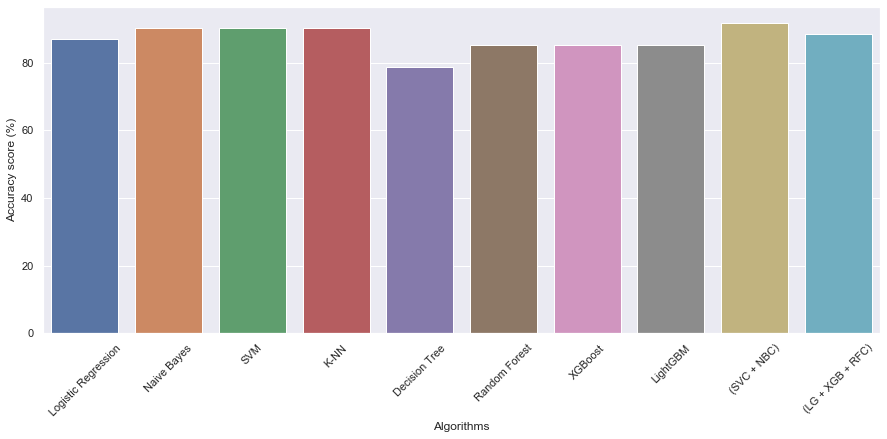

In [56]:
#Bar Graph showing the accuracies of all models including the ensembles formed
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_lightgbm,ensemble_accuracy,ensemble_accuracy1]
algorithms = ["Logistic Regression","Naive Bayes","SVM","K-NN","Decision Tree","Random Forest","XGBoost","LightGBM","(SVC + NBC)","(LG + XGB + RFC)"]    

for i in range(len(algorithms)):
    print("The accuracy achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.ylabel("Accuracy score (%)")
sns.barplot(algorithms,scores)


## The above graph shows the enhancement in the accuracies using ENSEMBLE LEARNING (VotingClassifier)

In [57]:
#AUC-ROC curve for all the models "EXCEPT THE ENSEMBLES FORMED"
r_probs = [0 for _ in range(len(test_y))]
SVC_probs = classifier2.predict_proba(test_x)
KNN_probs=best_knn.predict_proba(test_x)
DTC_probs=best_dtc.predict_proba(test_x)
RFC_probs=best_rfc.predict_proba(test_x)
NBC_probs=nbc.predict_proba(test_x)
XGB_probs=best_xgb.predict_proba(test_x)
LGBM_probs = best_light.predict_proba(test_x)
LG_probs=classifier.predict_proba(test_x)
print(SVC_probs)

#Taking only the positive values
SVC_probs=SVC_probs[:,1]
KNN_probs=KNN_probs[:,1]
DTC_probs=DTC_probs[:,1]
RFC_probs=RFC_probs[:,1]
NBC_probs=NBC_probs[:,1]
XGB_probs=XGB_probs[:,1]
LGBM_probs=LGBM_probs[:,1]
LG_probs=LG_probs[:,1]

[[0.23294058 0.76705942]
 [0.14935328 0.85064672]
 [0.24909789 0.75090211]
 [0.04759376 0.95240624]
 [0.02929718 0.97070282]
 [0.11619918 0.88380082]
 [0.22320482 0.77679518]
 [0.17401073 0.82598927]
 [0.13044764 0.86955236]
 [0.31312836 0.68687164]
 [0.03638415 0.96361585]
 [0.59181611 0.40818389]
 [0.97721504 0.02278496]
 [0.95560037 0.04439963]
 [0.73618909 0.26381091]
 [0.9791918  0.0208082 ]
 [0.09563824 0.90436176]
 [0.91725676 0.08274324]
 [0.21369132 0.78630868]
 [0.98753879 0.01246121]
 [0.1029226  0.8970774 ]
 [0.99189863 0.00810137]
 [0.65833178 0.34166822]
 [0.93169785 0.06830215]
 [0.70187081 0.29812919]
 [0.98759389 0.01240611]
 [0.12869284 0.87130716]
 [0.14220008 0.85779992]
 [0.60519183 0.39480817]
 [0.03436395 0.96563605]
 [0.18135029 0.81864971]
 [0.98998158 0.01001842]
 [0.96340231 0.03659769]
 [0.95745157 0.04254843]
 [0.01934645 0.98065355]
 [0.01165899 0.98834101]
 [0.53234337 0.46765663]
 [0.33878311 0.66121689]
 [0.81498347 0.18501653]
 [0.84435229 0.15564771]


In [58]:
print(SVC_probs)

[0.76705942 0.85064672 0.75090211 0.95240624 0.97070282 0.88380082
 0.77679518 0.82598927 0.86955236 0.68687164 0.96361585 0.40818389
 0.02278496 0.04439963 0.26381091 0.0208082  0.90436176 0.08274324
 0.78630868 0.01246121 0.8970774  0.00810137 0.34166822 0.06830215
 0.29812919 0.01240611 0.87130716 0.85779992 0.39480817 0.96563605
 0.81864971 0.01001842 0.03659769 0.04254843 0.98065355 0.98834101
 0.46765663 0.66121689 0.18501653 0.15564771 0.00753689 0.86619801
 0.8512154  0.01143731 0.6014386  0.90251215 0.62068046 0.99051827
 0.93673786 0.98007371 0.23172238 0.7545829  0.79986267 0.96475574
 0.95808723 0.30283591 0.87549034 0.10146048 0.84800767 0.31073974
 0.05475635]


In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

In [60]:
r_auc = roc_auc_score(test_y, r_probs)
SVC_auc = roc_auc_score(test_y, SVC_probs)
KNN_auc = roc_auc_score(test_y, KNN_probs)
DTC_auc = roc_auc_score(test_y, DTC_probs)
RFC_auc = roc_auc_score(test_y, RFC_probs)
NBC_auc = roc_auc_score(test_y, NBC_probs)
XGB_auc = roc_auc_score(test_y, XGB_probs)
LGBM_auc = roc_auc_score(test_y, LGBM_probs)
LG_auc = roc_auc_score(test_y, LG_probs)

In [61]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('SVC: AUROC = %.3f' % (SVC_auc))
print('KNN: AUROC = %.3f' % (KNN_auc))
print('DTC: AUROC = %.3f' % (DTC_auc))
print('RFC: AUROC = %.3f' % (RFC_auc))
print('NBC: AUROC = %.3f' % (NBC_auc))
print('XGB: AUROC = %.3f' % (XGB_auc))
print('LGBM: AUROC = %.3f' % (LGBM_auc))
print('LG: AUROC = %.3f' % (LG_auc))

Random (chance) Prediction: AUROC = 0.500
SVC: AUROC = 0.908
KNN: AUROC = 0.916
DTC: AUROC = 0.846
RFC: AUROC = 0.903
NBC: AUROC = 0.926
XGB: AUROC = 0.881
LGBM: AUROC = 0.902
LG: AUROC = 0.898


In [62]:
r_fpr, r_tpr, _ = roc_curve(test_y, r_probs)
svc_fpr, svc_tpr, _ = roc_curve(test_y, SVC_probs)
knn_fpr, knn_tpr, _ = roc_curve(test_y, KNN_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(test_y, DTC_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(test_y, RFC_probs)
nbc_fpr, nbc_tpr, _ = roc_curve(test_y, NBC_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(test_y, XGB_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(test_y, LGBM_probs)
lg_fpr, lg_tpr, _ = roc_curve(test_y, LG_probs)

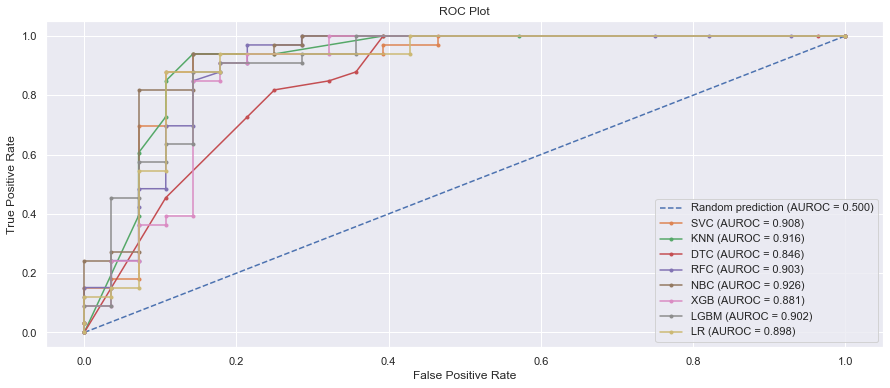

In [63]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC (AUROC = %0.3f)' % SVC_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='DTC (AUROC = %0.3f)' % DTC_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC (AUROC = %0.3f)' % RFC_auc)
plt.plot(nbc_fpr, nbc_tpr, marker='.', label='NBC (AUROC = %0.3f)' % NBC_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB (AUROC = %0.3f)' % XGB_auc)
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='LGBM (AUROC = %0.3f)' % LGBM_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='LR (AUROC = %0.3f)' % LG_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## End of Project